In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [24]:
import pandas as pd


In [25]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [26]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [27]:
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [28]:
X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X.columns:  # Use 'X' (uppercase) to match the variable used in train_test_split
    if X[column].dtype == 'object':  # Apply Label Encoding only to columns with object (string) dtype
        X[column] = le.fit_transform(X[column])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini', random_state=0)
DT.fit(X_train, y_train)  # Now the model should fit without the ValueError

DecisionTreeClassifier(random_state=0)

In [41]:
y_pred_train = DT.predict(X_train)
y_pred_test = DT.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, y_pred_train).round(3))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test).round(3))

Training Accuracy: 1.0
Testing Accuracy: 0.617


[Text(0.7195339848308051, 0.9761904761904762, 'x[3] <= 24.5\ngini = 0.327\nsamples = 480\nvalue = [381, 99]'),
 Text(0.5954273628938156, 0.9285714285714286, 'x[2] <= 197770.0\ngini = 0.349\nsamples = 373\nvalue = [289, 84]'),
 Text(0.47323512252042005, 0.8809523809523809, 'x[3] <= 14.5\ngini = 0.343\nsamples = 369\nvalue = [288, 81]'),
 Text(0.25685530921820304, 0.8333333333333334, 'x[3] <= 11.5\ngini = 0.3\nsamples = 239\nvalue = [195, 44]'),
 Text(0.12981330221703619, 0.7857142857142857, 'x[2] <= 27057.0\ngini = 0.337\nsamples = 182\nvalue = [143, 39]'),
 Text(0.12047841306884481, 0.7380952380952381, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13914819136522755, 0.7380952380952381, 'x[2] <= 80947.5\ngini = 0.332\nsamples = 181\nvalue = [143, 38]'),
 Text(0.056009334889148193, 0.6904761904761905, 'x[2] <= 39943.0\ngini = 0.222\nsamples = 55\nvalue = [48, 7]'),
 Text(0.03733955659276546, 0.6428571428571429, 'x[2] <= 37570.0\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(

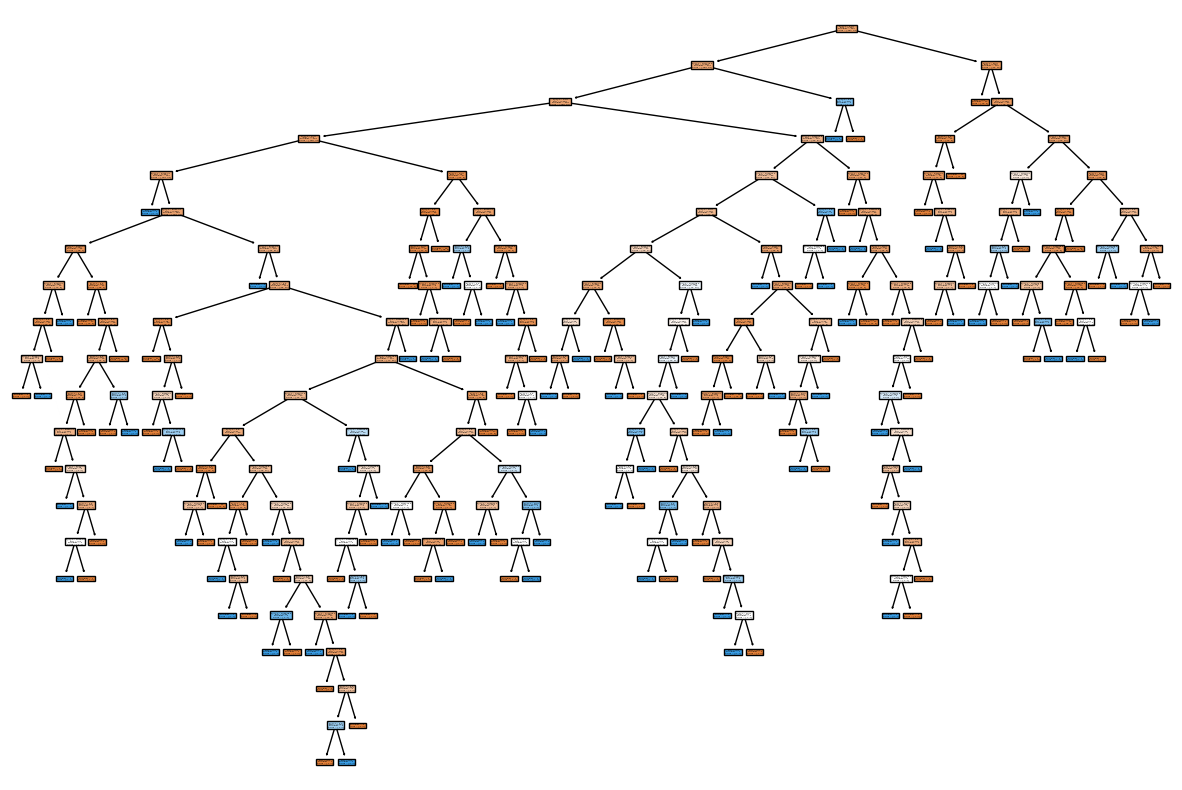

In [45]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(DT, filled=True)

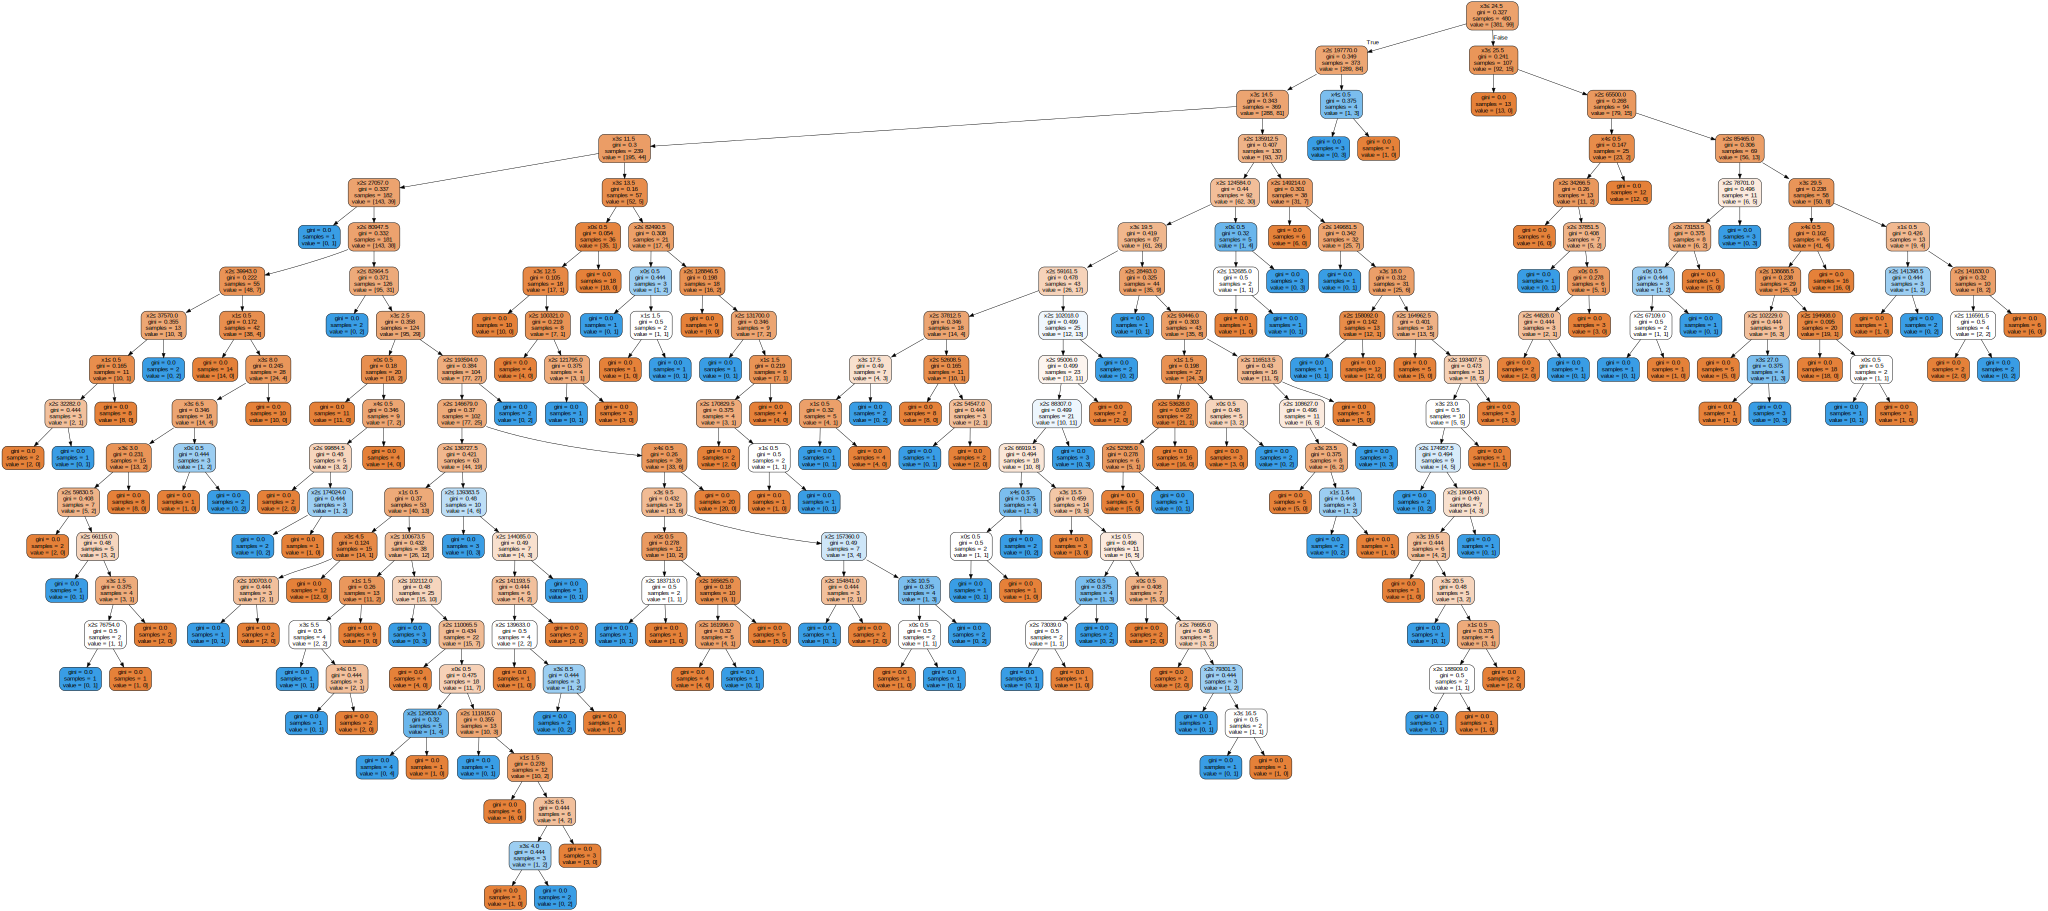

In [46]:
from textwrap import fill
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT, filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [47]:
print('Total number of nodes',DT.tree_.node_count)
print('Total number of leaves',DT.tree_.n_leaves)
print('Depth of the tree',DT.tree_.max_depth)

Total number of nodes 287
Total number of leaves 144
Depth of the tree 20
